## MEMORIA PROYECTO ML

### I. Introducción

* Una empresa de Telecomunicaciones quiere crecer en clientes. Para conseguirlo trabajará en dos frentes:
    
    -La captación de clientes<br>
    -La fidelización de la cartera entendida como la recuperación de cliente que deseen abandonar la Compañia
    
* Objetivos y alcance del proyecto

    -Determinar segmentode cliente con probabilidad de abandono para fideizarlos<br>
    -Optener estimación de resultado conjunto de ambas acciones y su coste

### II. Dataset

* El dataset de tiene su origen en https://data.world/

* Tiene poco más de 7k reguistros y 21 campos repartidas en tres archivos que uniremos.
* Variables:
  
        1,CustomerID, El identificador único de cada cliente
        2,Gender, El sexo de una persona
        3,SeniorCitizen, Si un cliente puede clasificarse como persona mayor.
        4,Partner, Si un cliente está casado/tiene una relación de convivencia.
        5,Dependientes, Si un cliente tiene dependientes (hijos/padres jubilados).
        6,Tenencia, El tiempo que lleva un cliente utilizando el servicio.
        7,PhoneService, Si un cliente tiene un servicio de teléfono fijo junto con el servicio de Internet.
        8,MultipleLines, Si un cliente tiene varias líneas de conexión a Internet.
        9,InternetService, El tipo de servicios de Internet elegido por el cliente.
        10,OnlineSecurity, Especifica si un cliente tiene seguridad en línea.
        11,Copia de seguridad en línea, Especifica si un cliente tiene copia de seguridad en línea.
        12,DeviceProtection, Especifica si un cliente ha optado por la protección de dispositivos.
        13,TechSupport, Especifica si un cliente ha optado por el soporte técnico o no.
        14,StreamingTV, Especifica si un cliente ha optado por el streaming de TV.
        15,StreamingMovies, Si un cliente tiene una opción de streaming de películas.
        16,Contrato, El tipo de contrato que ha elegido un cliente.
        17,PaperlessBilling, Si un cliente ha optado por la facturación sin papel.
        18,PaymentMethod, Especifica el método de pago de las facturas.
        19,MonthlyCharges, Especifica el dinero que paga un cliente cada mes.
        20,TotalCharges, El dinero total pagado por el cliente a la empresa.
        21,Churn, Es la variable objetivo que especifica si un cliente ha churned o no.

* Análisis exploratorio de los datos

In [11]:
# Tratamiento de datos
# ==============================================================================

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import movecolumn as mc


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score,accuracy_score,recall_score,precision_score,f1_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# importación de funciones y diccionarios
# ==============================================================================
import os, sys
dir_path =sys.path[0]
#dir_path = os.path.dirname(os.path.realpath(__file__))
parent_dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
sys.path.insert(0, parent_dir_path)
sys.path.append("..")


import utils.funciones_churn as fc
import utils.diccionarios as dcc


In [12]:
#cargo los dataset 
df=pd.read_csv('data\\churn_data.csv')
dfc=pd.read_csv('data\\customer_data.csv')
dfi=pd.read_csv('data\\internet_data.csv')

In [13]:
#creo un único df con la info de los tres ficheros
df=df.merge(dfi)
df=df.merge(dfc)

In [14]:
#pongo el Id como índice del dataset y muevo el campo target como última columna
df.set_index(keys='customerID',drop=True,inplace=True)
mc.MoveToLast(df,'Churn')

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No
5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,Yes
7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,No
9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,No
2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No phone service,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,No


In [15]:
#guardamos una copia del df original y de su lista de columnas
dft=df
lista_ori=list(dft.columns)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null 

In [17]:
df.head(5)

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No
5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,Yes
7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,No
9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,Yes


In [18]:
      
fc.data_report(df)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
tenure,int64,0.0,73,1.04
PhoneService,object,0.0,2,0.03
Contract,object,0.0,3,0.04
PaperlessBilling,object,0.0,2,0.03
PaymentMethod,object,0.0,4,0.06
MonthlyCharges,float64,0.0,1585,22.50
TotalCharges,object,0.0,6531,92.73
MultipleLines,object,0.0,3,0.04
InternetService,object,0.0,3,0.04


#### III. Preprocesamiento de los datos

* Ya hemos comprobado que no hay nan
* Aplicamos funcion fc.transfor para tratar los datos, realizanso:
    

In [19]:
#aplicamos las transformaciones definidas en al función transfor y guardamos una copia de df
df=fc.transfor(df,dcc.dict_MultiLine,dcc.dict_ONLServ,dcc.dict_features)
dfp=df

##### Las transformaciones realizadas incluyen:
    - Label encoding por diccionarios a las variables categóricas
    - Un get dummies de la columna 'InternetService'
    - Creación de nuevas variables:
            -n_pp= nº de servicios básicos (telefono y internet)
            -n_pi= nº de servicios de internet
            -Tipo de internet
            -incr= nos dice si la cuota mensual actual es mayor, menor o igual que el total de las cuotas/tenure

### EDA

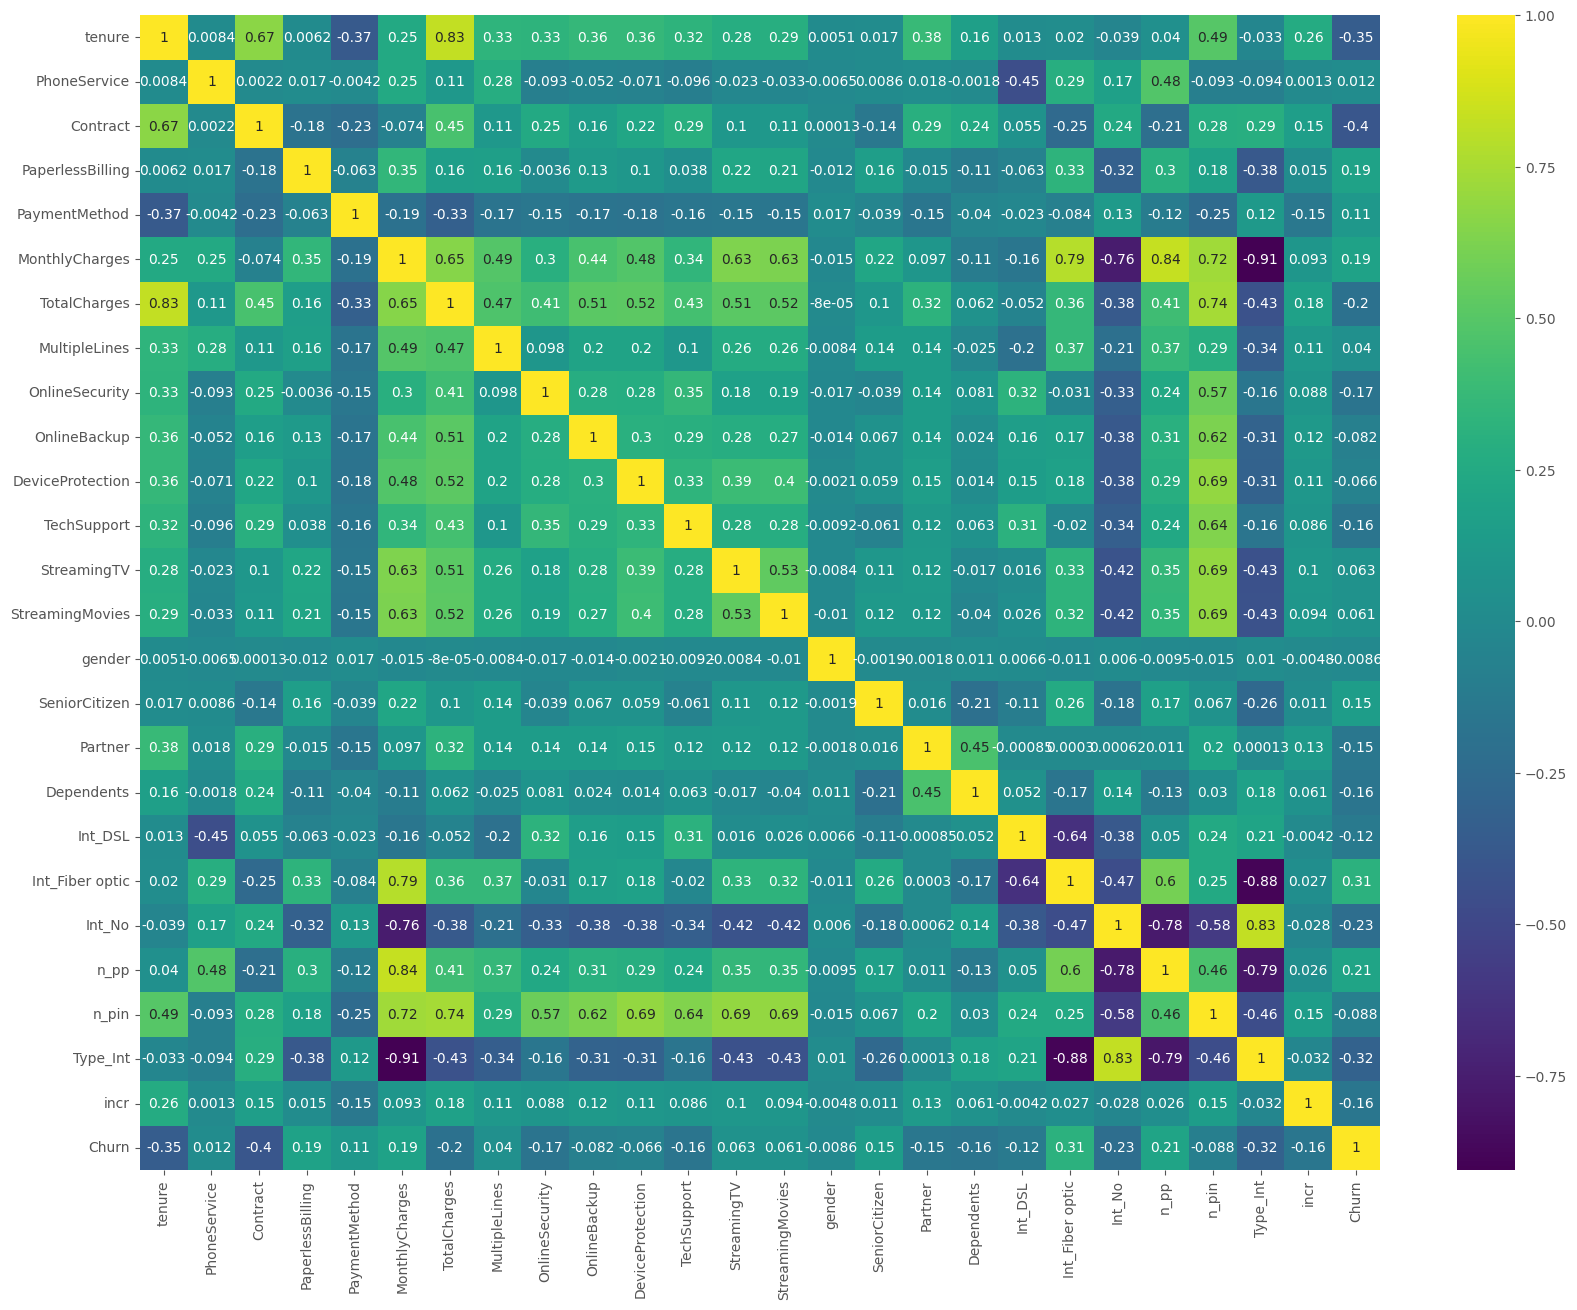

In [20]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),annot=True, cmap='viridis');

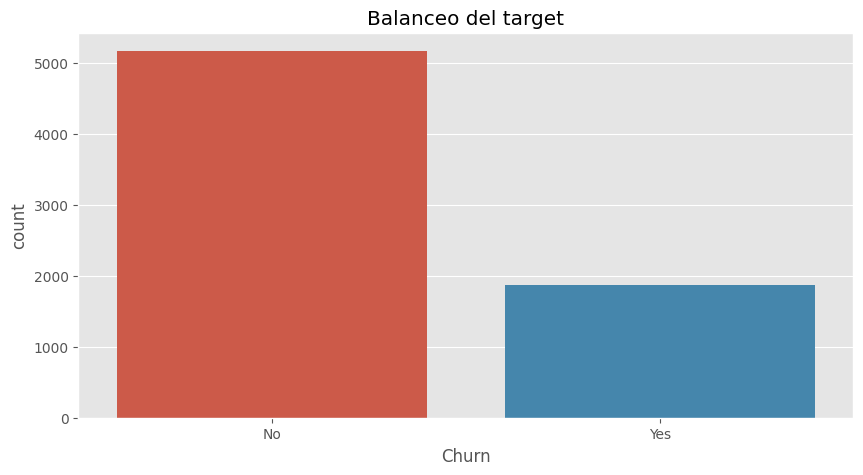

In [21]:

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

sns.countplot(x='Churn',data=dft)
axes.set_title("Balanceo del target");

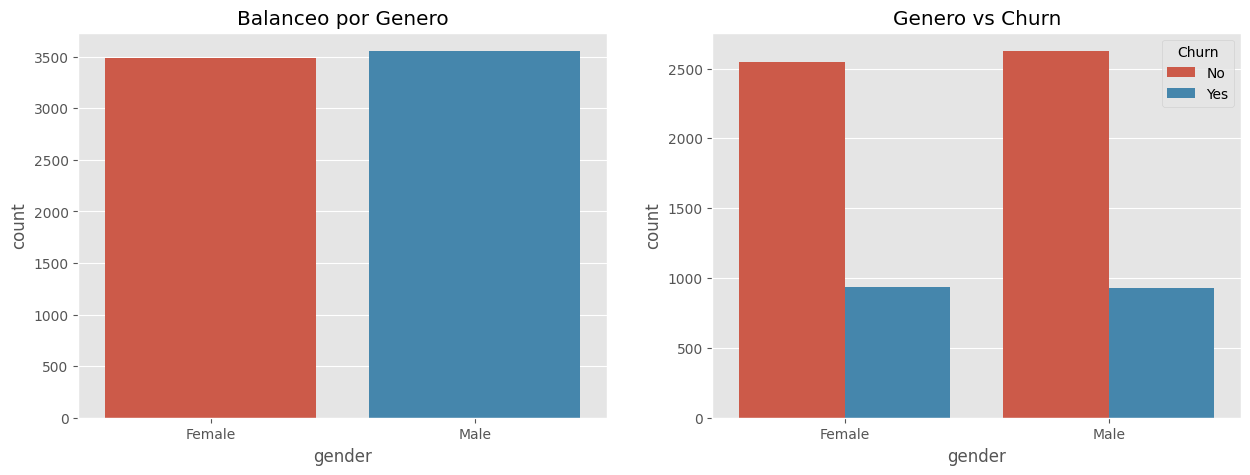

In [22]:


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["gender"], ax=axes[0])
axes[0].set_title("Balanceo por Genero")

# Categorica vs target
sns.countplot(x=dft["gender"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("Genero vs Churn");

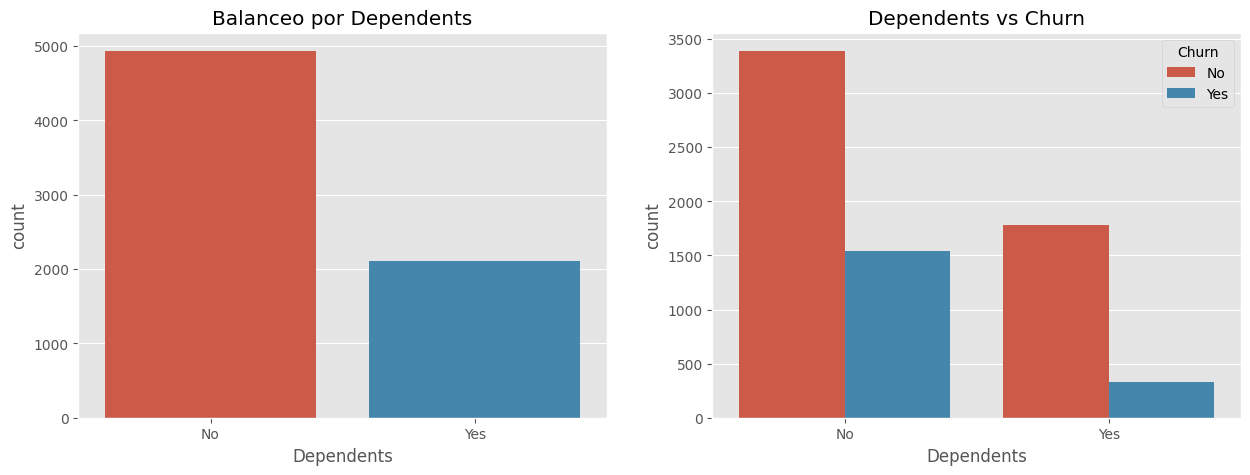

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["Dependents"], ax=axes[0])
axes[0].set_title("Balanceo por Dependents")

# Categorica vs target
sns.countplot(x=dft["Dependents"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("Dependents vs Churn");

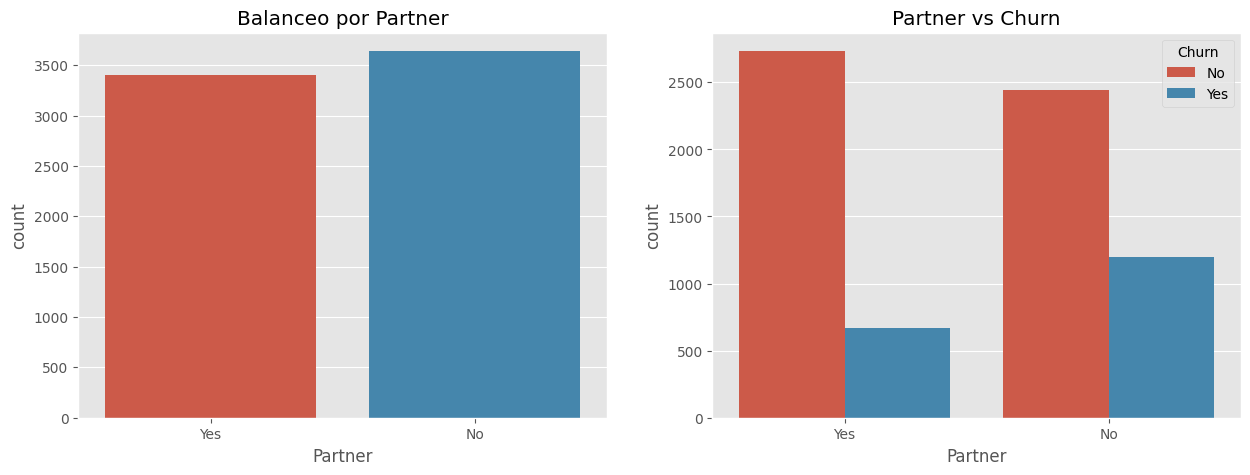

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["Partner"], ax=axes[0])
axes[0].set_title("Balanceo por Partner")

# Categorica vs target
sns.countplot(x=dft["Partner"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("Partner vs Churn");

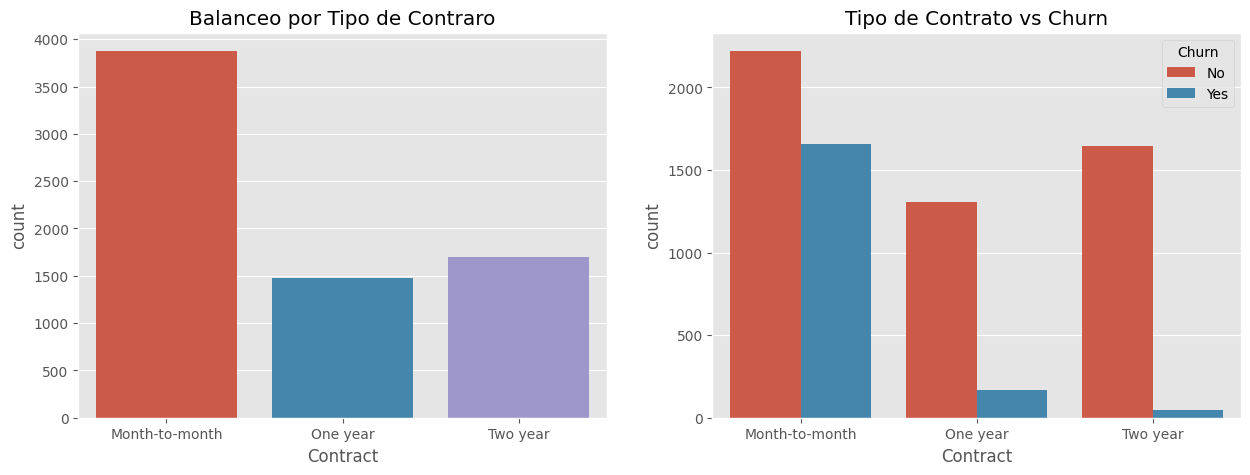

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["Contract"], ax=axes[0])
axes[0].set_title("Balanceo por Tipo de Contraro")

# Categorica vs target
sns.countplot(x=dft["Contract"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("Tipo de Contrato vs Churn");

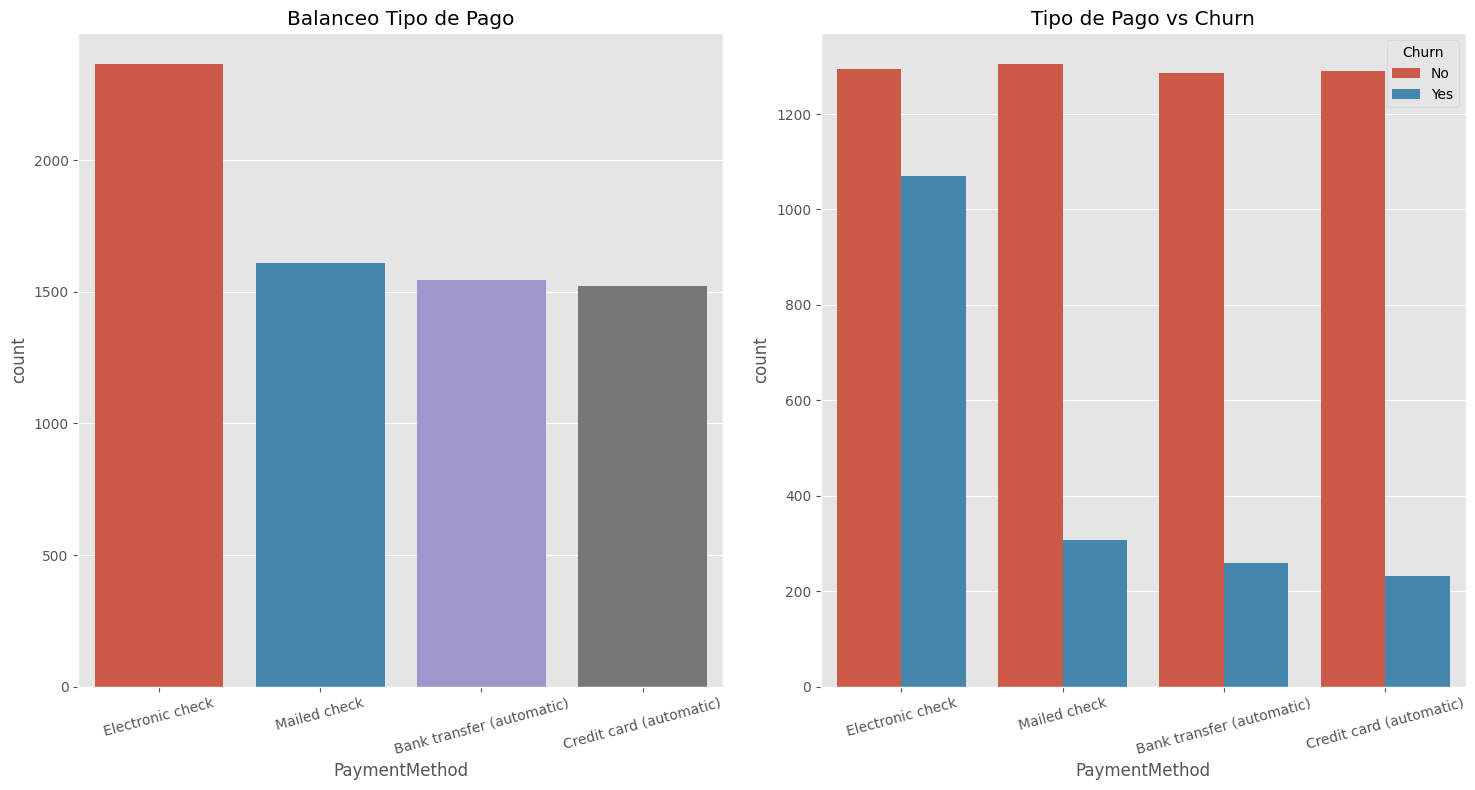

''

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

# Conteo de categorica
sns.countplot(x=dft["PaymentMethod"], ax=axes[0])

axes[0].set_title("Balanceo Tipo de Pago")

# Categorica vs target
sns.countplot(x=dft["PaymentMethod"], hue=dft['Churn'], ax=axes[1], dodge=True)

axes[1].set_title("Tipo de Pago vs Churn")

for ax in axes:
    ax.tick_params(axis='x',rotation=15)
plt.tight_layout()
plt.show()
;

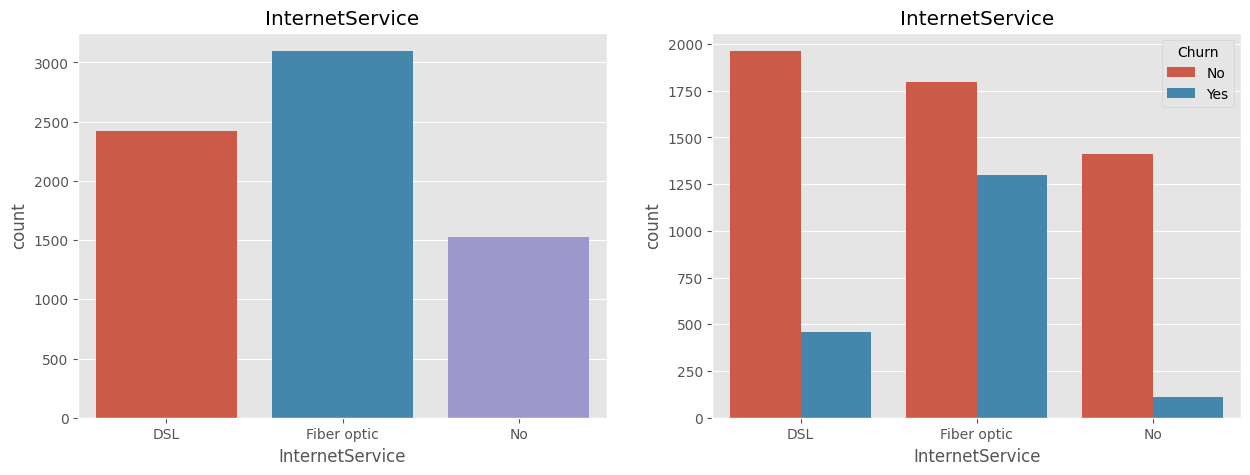

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["InternetService"], ax=axes[0])
axes[0].set_title("InternetService")

# Categorica vs target
sns.countplot(x=dft["InternetService"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("InternetService");

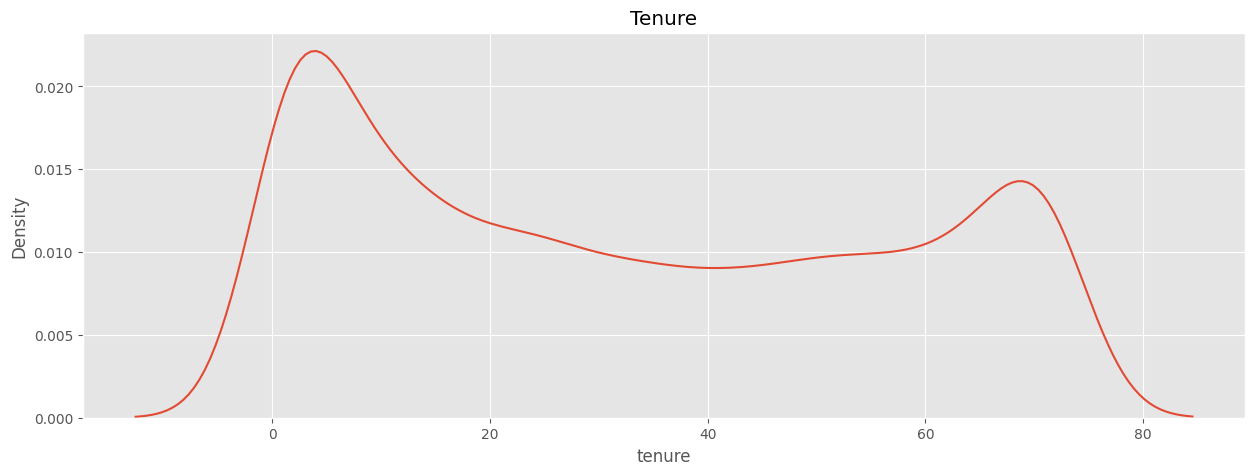

In [28]:
# Funcion de densidad + target
temp=df

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(data=temp, x='tenure')
axes.set_title("Tenure");

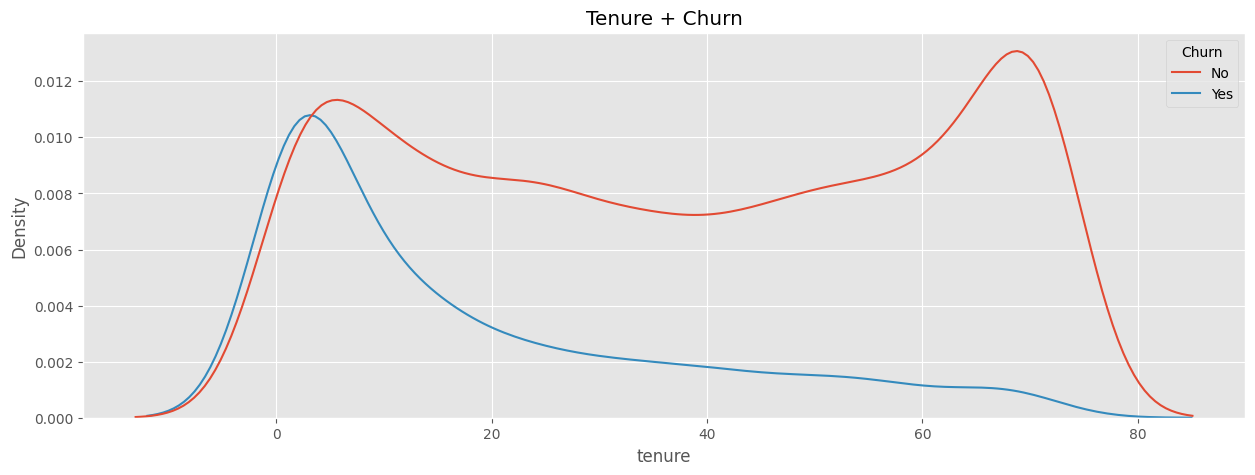

In [29]:
# Funcion de densidad + target
temp=dft

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(data=temp, x='tenure', hue = 'Churn')
axes.set_title("Tenure + Churn");

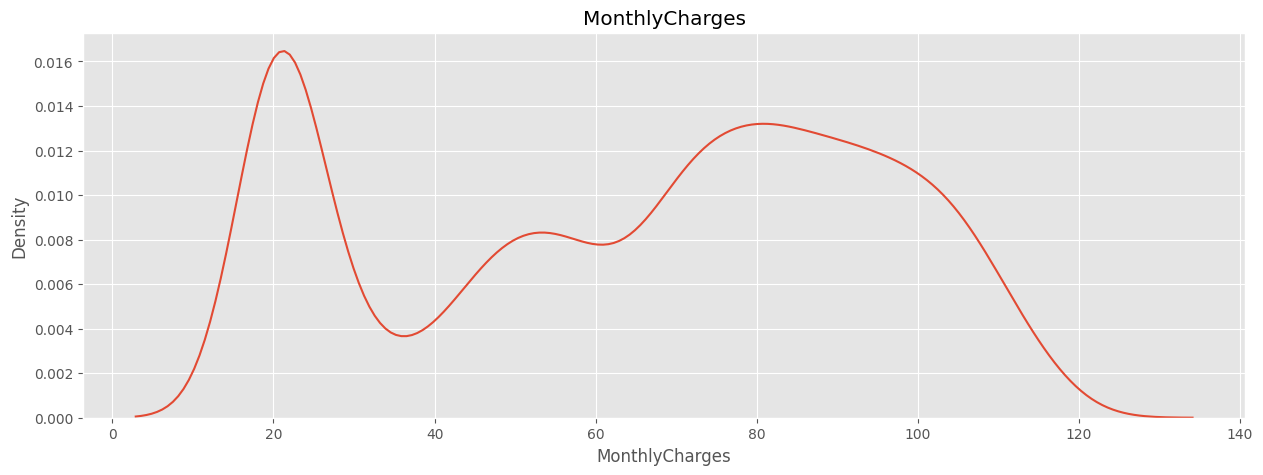

In [30]:
# Funcion de densidad + target
temp=dft

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(data=temp, x='MonthlyCharges')
axes.set_title("MonthlyCharges");

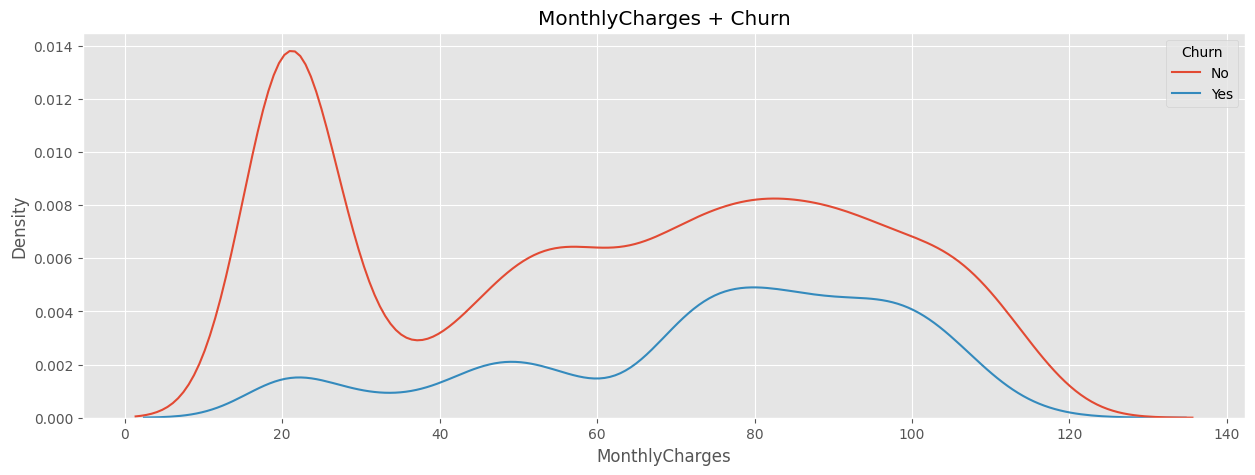

In [31]:
# Funcion de densidad + target
temp=dft

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(data=temp, x='MonthlyCharges', hue = 'Churn')
axes.set_title("MonthlyCharges + Churn");

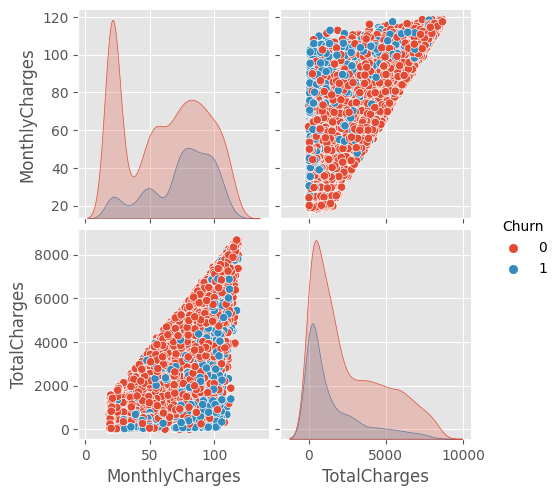

In [32]:
# Variables numericas vs target categórico


temp=df.loc[:,['MonthlyCharges','TotalCharges','Churn']]

sns.pairplot(temp,
            kind='scatter',
            hue='Churn');

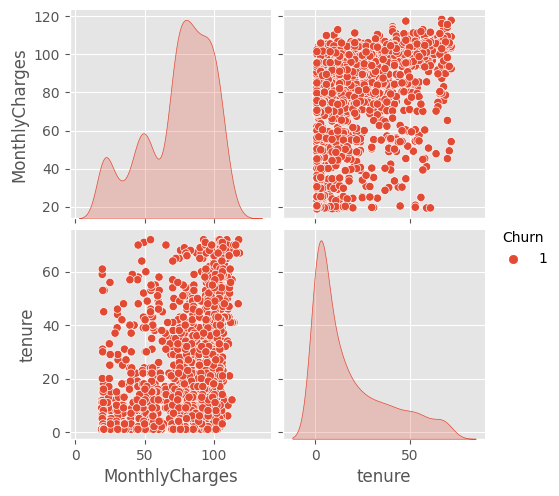

In [33]:
# Variables numericas vs target categórico


temp=df[df['Churn']==1].loc[:,['MonthlyCharges','tenure','Churn']]
sns.pairplot(temp,
            kind='scatter',
            hue='Churn');

#### IV. Modelado

* Entrenamiento de modelos supervisados/no supervisados
* Evaluación de los diferentes modelos e iteraciones.
* Selección e interpretación del modelo final.

In [34]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1:]

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2, random_state=8)

In [36]:
# exportamos los archivos de test ya tratados 
X_test.to_csv('data\\X_test.csv')
y_test.to_csv('data\\y_test.csv')

In [37]:
#realizamos un oversampling 
df_sam1=pd.concat([X_train,y_train],axis=1)
df_sam=df_sam1[df_sam1['Churn']==1].sample(n=2000,random_state=15,replace=True)
df_sam=pd.concat([df_sam,df])

In [38]:
X_train=df_sam.iloc[:,0:-1]
y_train=df_sam.iloc[:,-1:]

In [39]:
# exportamos los archivos de train ya tratados y balanceados 
X_train.to_csv('data\\X_train.csv')
y_train.to_csv('data\\y_train.csv')

In [40]:
# obtenemos la importancia a priori de las variables
select_feature = SelectKBest(f_classif, k=len(X_train.columns)).fit(X_train, y_train)
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df['tipo']=selected_features_df['Feature'].apply(lambda x:'Básica' if x in lista_ori else 'Transformada')
selected_features_df.sort_values(by='Scores', ascending=True,inplace=True)


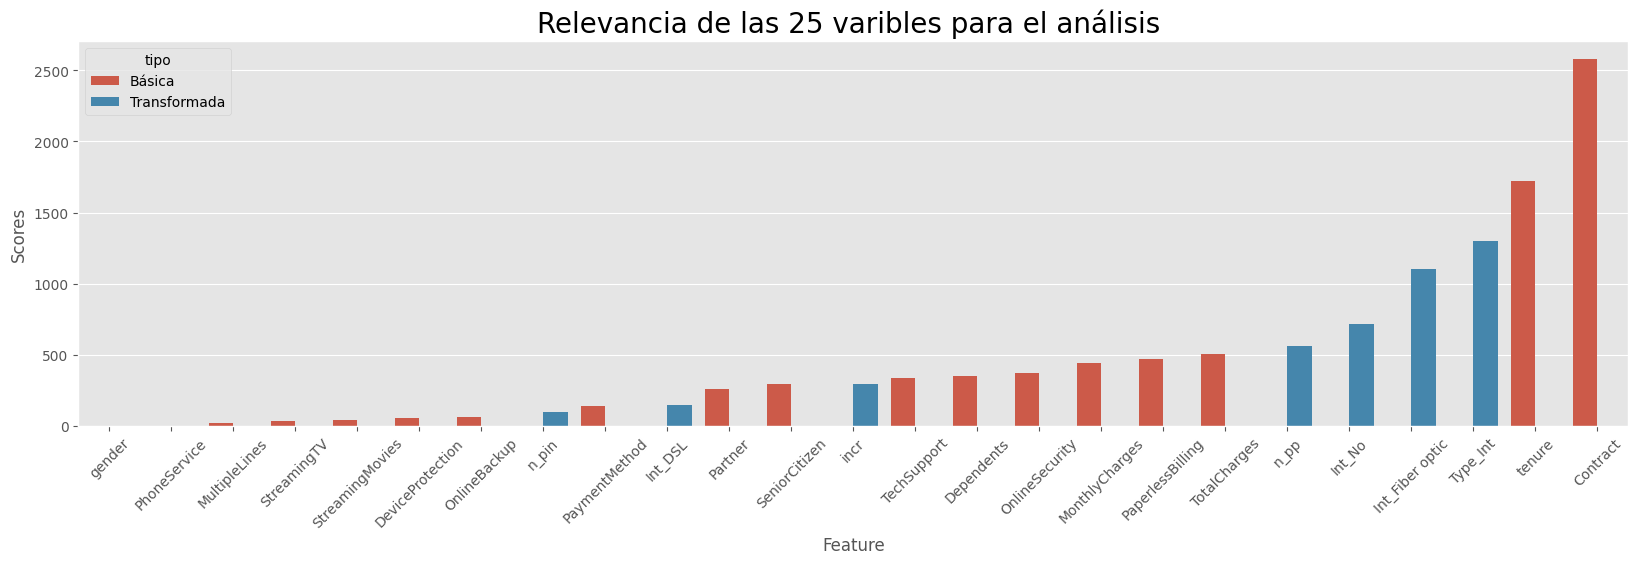

In [41]:
temp=selected_features_df
plt.figure(figsize=(20, 5))
sns.barplot(x="Feature", y="Scores", data=temp,hue='tipo')
plt.xticks(rotation=45)

plt.title("Relevancia de las 25 varibles para el análisis ", size=20)
    
plt.show()

### Entrenamiento


In [42]:
from sklearn import decomposition
sc = StandardScaler()
pca = decomposition.PCA()
X=df.iloc[:,:-1]
n_components = list(range(1,X.shape[1]+1,1))
dtreeCLF = DecisionTreeClassifier()

In [43]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("selectkbest", SelectKBest()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    'selectkbest__k': [18,20,22],
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)}


rfc = Pipeline(steps=[
    ("selectkbest", SelectKBest()),
    ("rfc",RandomForestClassifier())
])

rfc_param = {    
    'selectkbest__score_func':[f_classif],
    'selectkbest__k': [22],
    "rfc__n_estimators": [800],
    "rfc__max_features": [5,9],
    "rfc__max_depth": [2,3,4,5,6],
    'rfc__criterion' : ['gini']
}



svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])


svm_param = {
    'selectkbest__k': [22],
    'svm__kernel': ['poly'],
    'svm__C': [0.1],
    'svm__degree': [4],
    'svm__gamma': ['auto']
}

knn = Pipeline(steps = [    
    ("knn_scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("knn", KNeighborsClassifier())
])

knn_param = {
    'selectkbest__k': [22],
    'knn__leaf_size': [30],
    'knn__n_neighbors':[5],
    'knn__p' : [2]

    
}

Dtree = Pipeline(steps = [ 

    ("sc", sc),
    ("pca", pca),
    ("DtreeCLF", DecisionTreeClassifier())
])

Dtree_param = {
    "DtreeCLF__criterion": ["gini", "entropy"], 
    "DtreeCLF__max_depth": [5,6],
    "DtreeCLF__min_samples_leaf": [1]
}

XGB = Pipeline(steps = [ 

    ("XGB_scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("XGB", XGBClassifier())
])

XGB_param = {
        'selectkbest__k': [22],
        'XGB__max_depth': [6,10],
        'XGB__gamma': [ 1,5,9],
        'XGB__reg_alpha' :[ 50,100],
        'XGB__reg_lambda' : [ 1],
        'XGB__colsample_bytree' :[ 1],
        'XGB__min_child_weight' : [1],
        'XGB__n_estimators': [150,180, 250],
        'XGB__seed': [0]
    }
ADA = Pipeline(steps = [ 

    ("ADA_scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("ADA", AdaBoostClassifier())
])

ADA_param = {
        'selectkbest__k': [22],
        'ADA__n_estimators': [100,150,180,250],
        'ADA__base_estimator': [DecisionTreeClassifier(max_depth=6)],
        'ADA__random_state':[0]}






In [44]:
gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)


gs_rfc = GridSearchCV(rfc,
                         rfc_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_knn = GridSearchCV(knn,
                         knn_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_Dtree = GridSearchCV(Dtree,
                         Dtree_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_XGB = GridSearchCV(XGB,
                         XGB_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_ADA = GridSearchCV(ADA,
                         ADA_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)


In [45]:
grids = {"gs_reg_log": gs_reg_log,
        "gs_rfc": gs_rfc,
        "gs_svm": gs_svm,
        "gs_knn": gs_knn,
        "gs_dtree": gs_Dtree,
        "gs_XGB": gs_XGB,
        "gs_ADA": gs_ADA   
             
        
        }

In [46]:
# tiempo de ejecución 10 min aprox

In [47]:
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [48]:
for nombre, grid_search in grids.items():
    print(f'{nombre} recall de {grid_search.best_score_}\n')

gs_reg_log recall de 0.7456661445154035

gs_rfc recall de 0.7751322113775421

gs_svm recall de 0.8159610930366442

gs_knn recall de 0.8066621145787309

gs_dtree recall de 0.7304112945334779

gs_XGB recall de 0.7562644763090599

gs_ADA recall de 0.9022767133925104




#### V. Predicción y resultados finales

* Descripción de la solución final y su impacto en el negocio
* Visualización de los resultados finales y predicciones



In [49]:


for nombre, grid_search in grids.items():
    print(f'{nombre} tiene como mejor score {grid_search.best_score_}\n')
    print(f'{nombre} tiene como mejor estimador {grid_search.best_estimator_}\n')
    print(f'con los parametros {grid_search.best_params_}\n')
    predictions = grid_search.predict(X_test)
    print(accuracy_score(y_test, predictions))
    print(recall_score(y_test, predictions))

gs_reg_log tiene como mejor score 0.7456661445154035

gs_reg_log tiene como mejor estimador Pipeline(steps=[('imputer', SimpleImputer()),
                ('selectkbest', SelectKBest(k=20)),
                ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=2.7825594022071245))])

con los parametros {'imputer__strategy': 'mean', 'reglog__C': 2.7825594022071245, 'reglog__penalty': 'l2', 'selectkbest__k': 20}

0.7395315826827538
0.7272727272727273
gs_rfc tiene como mejor score 0.7751322113775421

gs_rfc tiene como mejor estimador Pipeline(steps=[('selectkbest', SelectKBest(k=22)),
                ('rfc',
                 RandomForestClassifier(max_depth=3, max_features=9,
                                        n_estimators=800))])

con los parametros {'rfc__criterion': 'gini', 'rfc__max_depth': 3, 'rfc__max_features': 9, 'rfc__n_estimators': 800, 'selectkbest__k': 22, 'selectkbest__score_func': <function f_classif at 0x000001F680C1B558>}

0.7281760113555713
0.7

### Evaluación de resultados

In [50]:
rRecall=[]
rAccuracy=[]
modelo=[]
for nombre, grid_search in grids.items():
    predictions = grid_search.predict(X_test)
    modelo.append(nombre)
    rAccuracy.append(accuracy_score(y_test, predictions))
    rRecall.append(recall_score(y_test, predictions))

temp = pd.DataFrame(
    {'modelo': modelo,
     'Accuracy': rAccuracy,
     'Recall': rRecall
    })
temp

,modelo,Accuracy,Recall
0,gs_reg_log,0.739532,0.727273
1,gs_rfc,0.728176,0.754011
2,gs_svm,0.710433,0.791444
3,gs_knn,0.760114,0.716578
4,gs_dtree,0.787083,0.697861
5,gs_XGB,0.751597,0.716578
6,gs_ADA,0.995032,0.989305


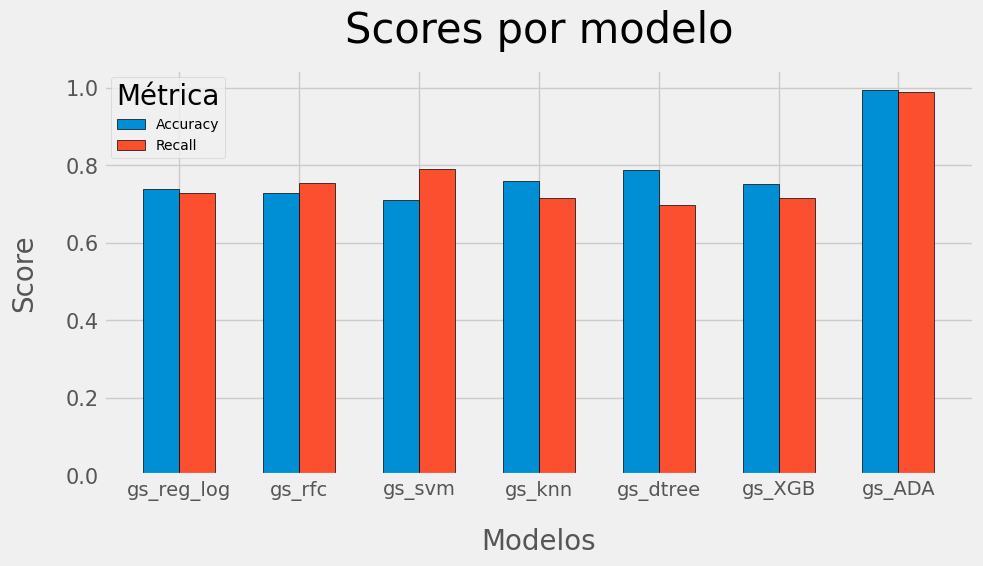

In [51]:

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (10,5))

label = temp["modelo"]

x = np.arange(len(label))

width = 0.3

rect1 = ax.bar(x - width/2, temp['Accuracy'], width = width, label = 'Accuracy',edgecolor = "black" )

rect2 = ax.bar(x + width/2, temp['Recall'], width = width, label = 'Recall',edgecolor = "black")

ax.set_ylabel("Score", fontsize = 20,labelpad = 20)
ax.set_xlabel("Modelos",fontsize = 20,labelpad =20)
ax.set_title("Scores por modelo",fontsize = 30, pad = 20)

ax.set_xticks(x)
ax.set_xticklabels(label)

ax.legend(title = "Métrica", fontsize = 10,title_fontsize = 20)

ax.tick_params(axis = "x",  which = "both", labelrotation = 0)
ax.tick_params(axis = "y", which = "both", labelsize = 15)

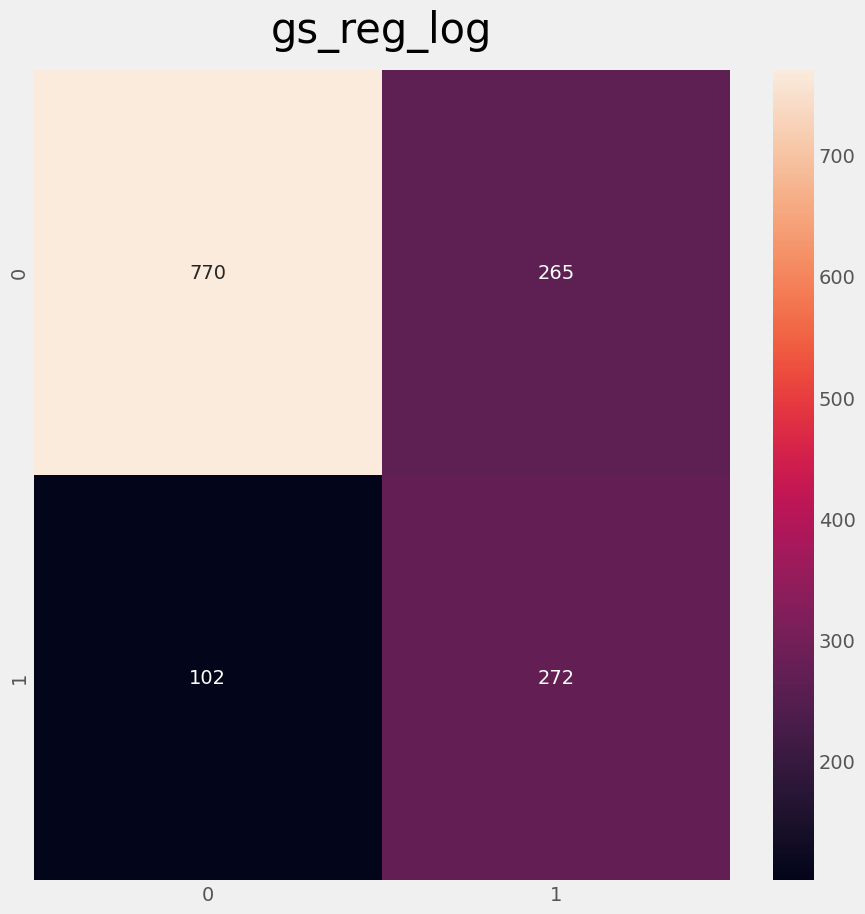

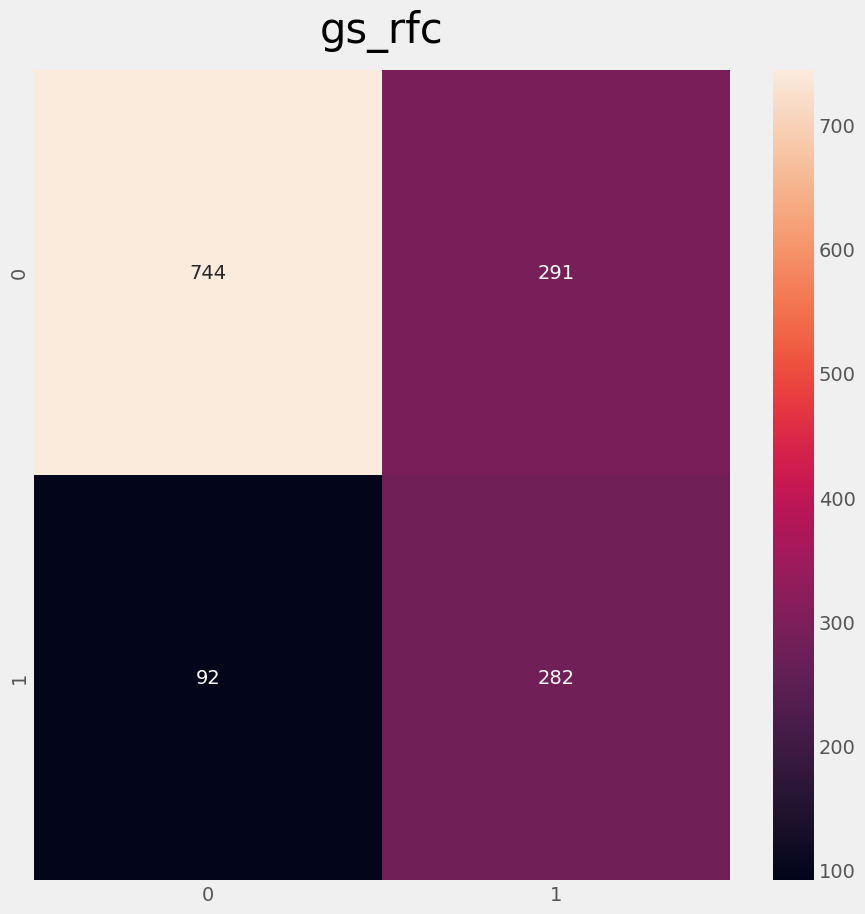

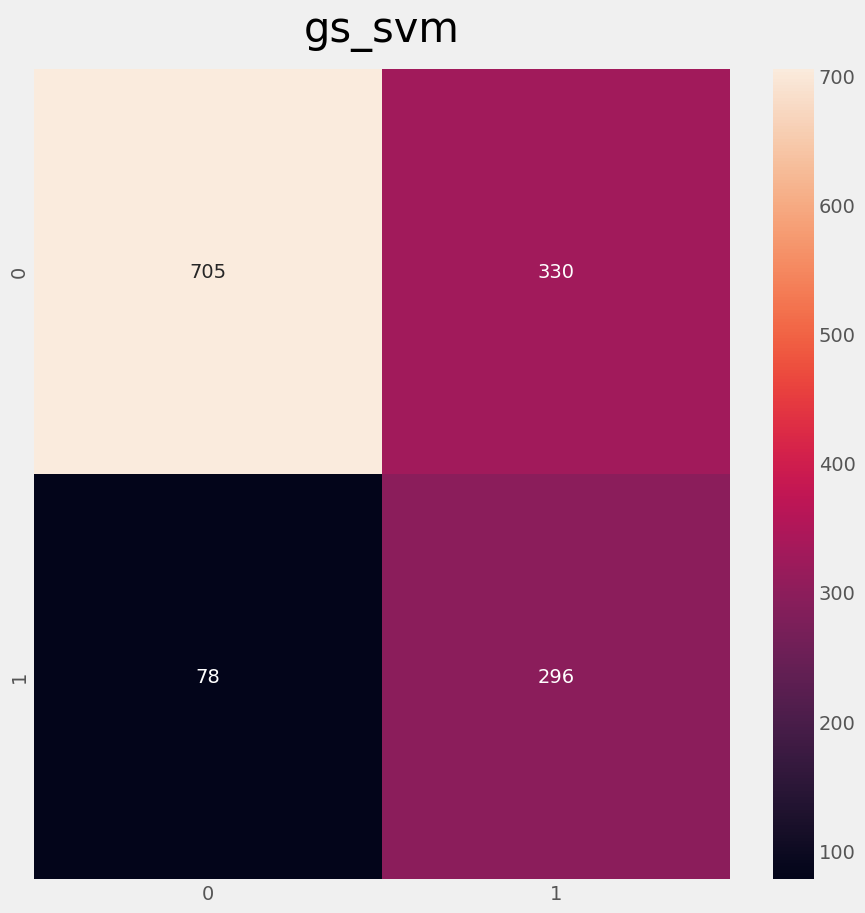

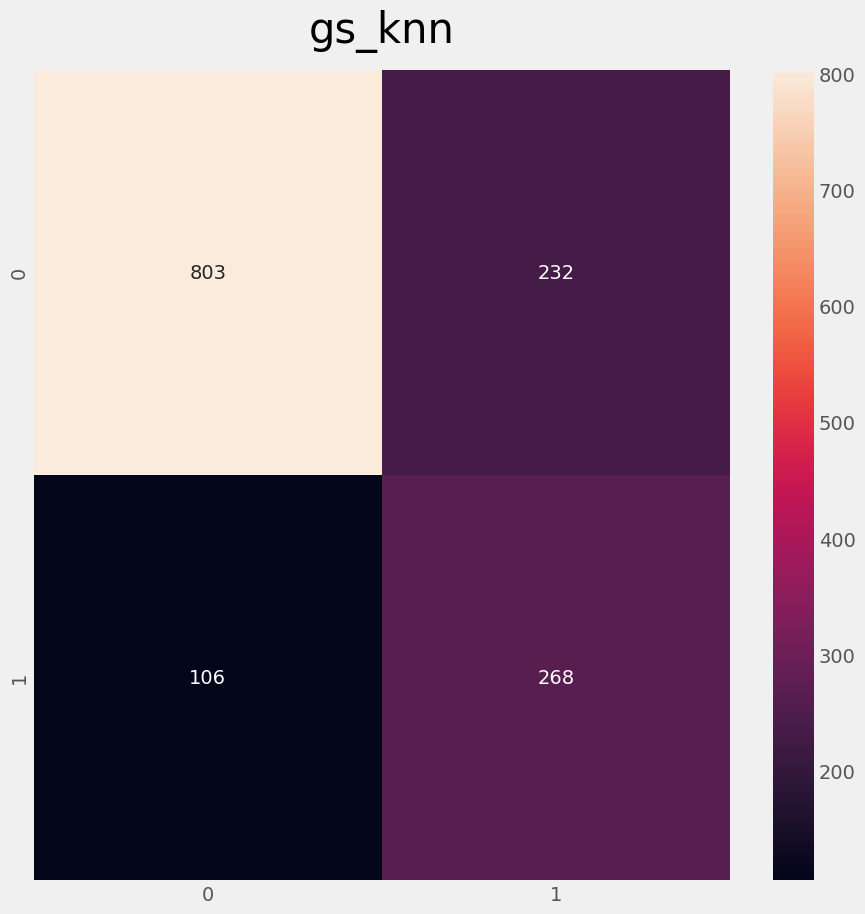

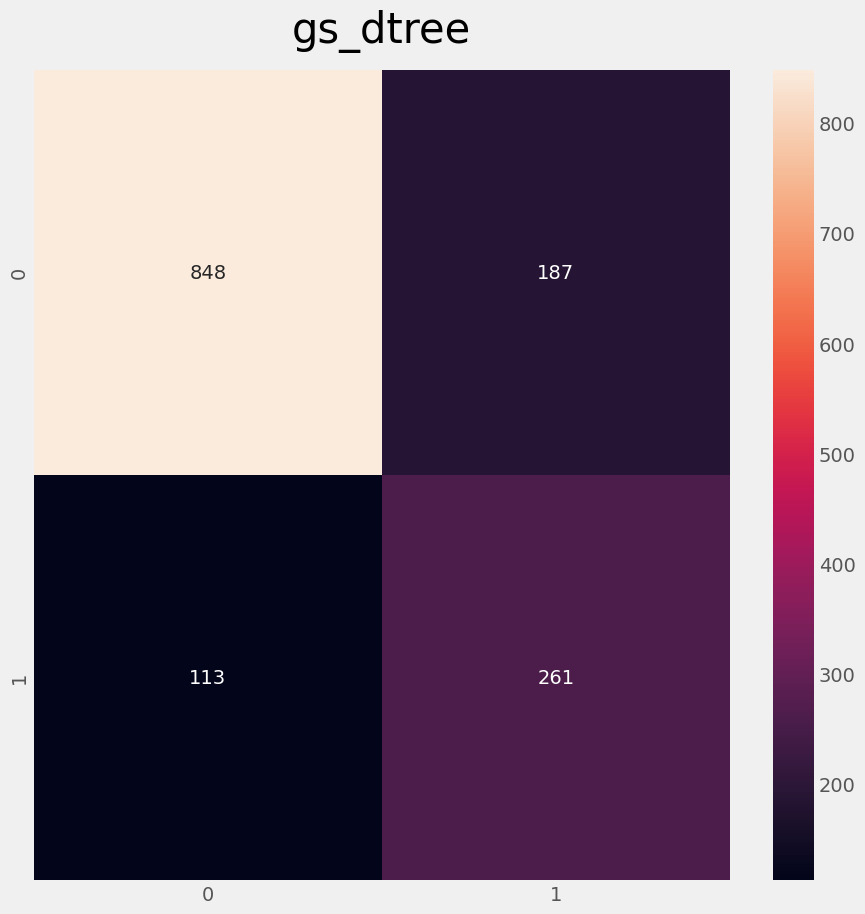

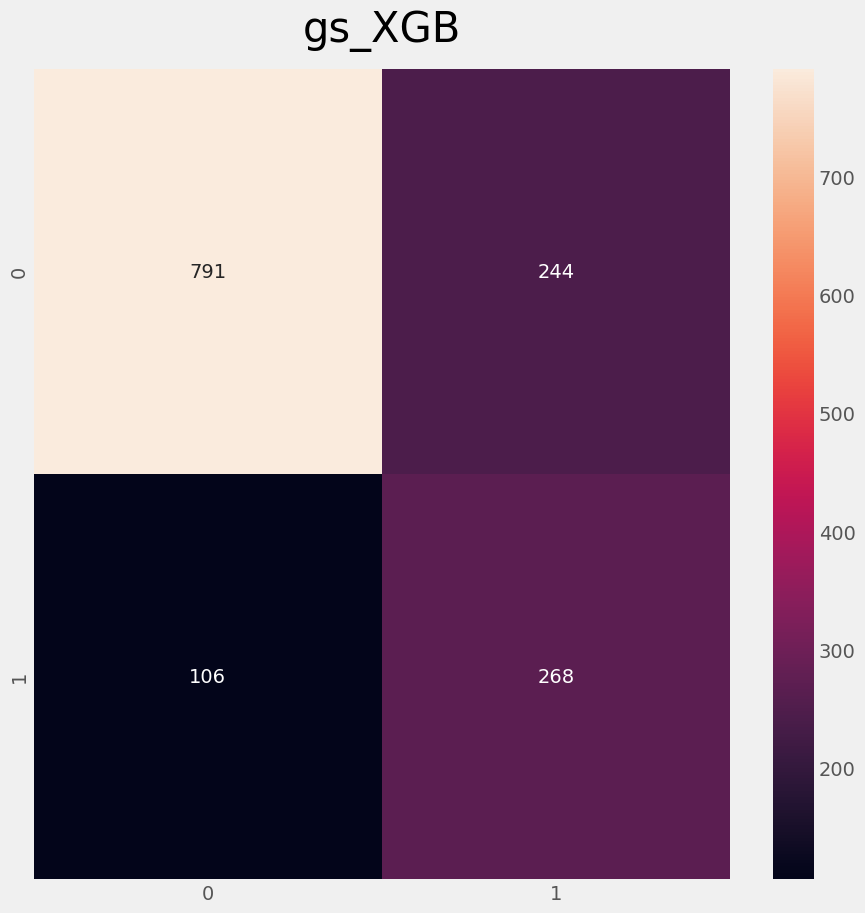

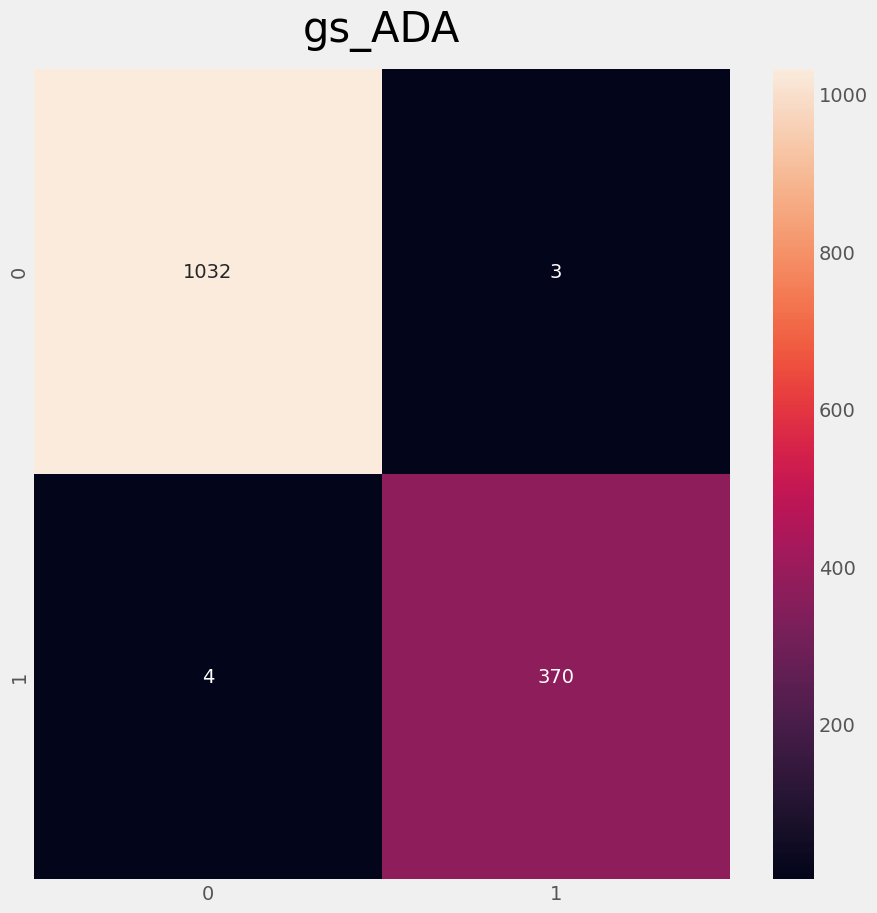

In [52]:
for nombre, grid_search in grids.items():

    predictions = grid_search.predict(X_test)
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
    sns.heatmap(confusion_matrix(y_test,predictions), annot=True , fmt=".0f")
    axes.set_title(nombre,fontsize = 30, pad = 20);

#### VI.Productivización

In [53]:
'''import pickle

with open('bestmodel', 'wb') as archivo_salida:
    pickle.dump(gs_ADA, archivo_salida)

archivo_salida.close()'''

"import pickle\n\nwith open('bestmodel', 'wb') as archivo_salida:\n    pickle.dump(gs_ADA, archivo_salida)\n\narchivo_salida.close()"

#### VII. Conclusiones y futuros pasos

* Escogeremos el modelo gs_ADA por tener los mejores resultdos en test para nuestra acción
* Transformaremos nuestro dataset para aplicarle el modelo:

    -Nos quedamos solo con los registros Churn=0<br>
    -Sumaremos 1 al tenure<br>
    -Sumaremos una mensualidad al total de mensualidades<br>

* De esta forma obtenemos el segmento de clientes a los que realizar la acción de fidelización que tienen un 40% de existo
* Mostramos los datos totales de clientes sumando 250 clientes de la acción de captación


In [54]:
dfn1=df[df['Churn']==0]
dfn1=dfn1.iloc[:,:-1]
dfn1['tenure']+=1
dfn1['TotalCharges']+=dfn1['MonthlyCharges']


In [55]:
predictions = gs_ADA.predict(dfn1)

In [56]:
seg=predictions.sum()
best_recall=temp[temp['modelo']=='gs_ADA']['Recall'].values
recu=round(seg*0.4*best_recall[0]) # multiplicamos por 0.4 por ser 40% de existo de las acciones d Fidelización

In [57]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    #name = "20", orientation = "v",
    measure = ["relative", "relative","relative", "total", "relative", "relative", "relative","total"],
    x = ["Cartera n-1", "Abandonos n", "Nuevos n", "Cartera n", "Abandonos", "Recuperaciones", "Nuevos n+1","Cartera n+1"],
    #textposition = "outside",
    text = ["7k", "-1.8k", "11", "5k", "-322", "+127","+250","Objetivo"],
    y = [7032, -1869, 11, 0, seg*(-1),recu ,250, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Evolución Volumen de Clientes",
        showlegend = False
)

fig.show()